# polarityReversal

## initiation 

In [167]:
import os
import mne
print(mne.__version__) # some functions (e.g. montage handling) will not continue to work from v0.2 onwards!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import shutil
from collections import Counter

parent_dir = 'D:/CHF/polarityReversal/'
base_dir = 'D:/CHF/polarityReversal/eeg/'
os.chdir(base_dir)

0.19.2


### definition of some parameters

In [168]:
stimfreq=[2,4,7,13]
stimfreq2=[i for i in stimfreq for _ in range(3)]

hemifields=['FVF','LVF','UVF'] # this was upside down in the initial processing, but now changed upper to lower and vice versa, because wrong definition in paradigm found
hemifields2=[i for _ in range(4) for i in hemifields]

cond = [str(i) + j for i, j in zip(stimfreq2, hemifields2)]

# timings for epoching and for plotting
tmin     = 0.
tmax     = 3.

### some MNE specific properties

In [169]:
# turn information status messages on, if off, type: mne.set_log_level('WARNING')
mne.set_log_level('INFO')

### colormaps for plotting

In [170]:
# define some colormaps
colormapQ3a=[[166/255,206/255,227/255], [31/255,120/255,180/255], [178/255,223/255,138/255]]
colormapQ4a=[(0,0,0),(51/255,160/255,44/255),(31/255,120/255,180/255),(0.5,0.5,0.5)]

# chose the colormap
cm       = colormapQ4a

### functions for analysis

#### folder / file handling

In [171]:
def subStr(sub):
    """ function to return the 2-character string of an integer subject number """
    if sub<10:
        subs = '0' + str(sub)
    else:
        subs = str(sub)
    return subs
    
def fileHandling(sub):
    """ function to delete old files and to return subject 2-character string """
    subs = subStr(sub)
    try:    # delete old files
        shutil.rmtree(base_dir + subs + os.sep + 'data/*')
        shutil.rmtree(base_dir + subs + os.sep + 'plots/*')
    except:
        pass
    return subs

#### event conversion

In [172]:
triggerDic = {11:0,12:0, # converts the trigger lengths (in number of scans/time points) to the index of different conditions
              16:1,17:1,
              22:2,23:2,
              27:3,28:3,
              33:4,34:4,
              38:5,39:5,
              44:6,45:6,
              50:7,51:7,
              55:8,56:8,
              61:9,62:9,
              66:10,67:10,
              72:11,73:11} # "5" and "6" are single stimulus onsets

def eventConversion(events, events_id, plot = False):
    s1 = events [events[:,2] == 1]
    s2 = events [events[:,2] == 2]

    diff = s2[:,0] - s1[:,0]
    k = list(Counter(diff).keys()) # equals to list(set(words))
    v = list(Counter(diff).values()) # counts the elements' frequency
    
    if plot: # optional, for debugging or checking which "trigger durations" occured how often
        f = sns.barplot(x = k,y = v)
        f.set_yscale("log")
    
    # apply trigger to stimulus conversion
    events_new = [] # transform to np array later
    ecounter = 0
    for e in events:
        if e[2] != 1:
            continue
        # change value
        try:
            e[2] = triggerDic[diff[ecounter]]
            events_new.append(e.tolist())
        except:
            pass
        ecounter += 1
    events_new = np.asarray(events_new)
    events_id_new = {cond[i]:i for i in range(12)}
    return events_new, events_id_new

In [ ]:
#def eventConversionSingleEvents(events, events_id, plot = False):

In [110]:
events, events_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2']


In [112]:
s1 = events [events[:,2] == 1]
s2 = events [events[:,2] == 2]

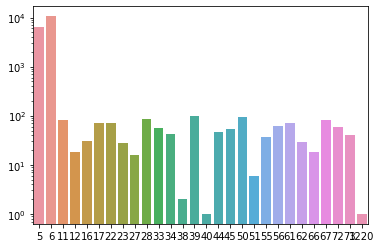

In [125]:
diff = s2[:,0] - s1[:,0]
k = list(Counter(diff).keys()) # equals to list(set(words))
v = list(Counter(diff).values()) # counts the elements' frequency

f = sns.barplot(x = k,y = v)
f.set_yscale("log")

In [127]:
events

array([[      0,       0,   99999],
       [      0,       0,   10001],
       [  12461,       0,       1],
       ...,
       [2155679,       0,       2],
       [2155713,       0,       1],
       [2155718,       0,       2]])

In [151]:
diff[:20]

array([1220,    6,    5,    6,    6,    5,    5,    6,    5,    6,    6,
          5,    6,    6,    5,    6,   73,    6,    6,    6])

In [ ]:
triggerDic = {11:0,12:0, # converts the trigger lengths (in number of scans/time points) to the index of different conditions
              16:1,17:1,
              22:2,23:2,
              27:3,28:3,
              33:4,34:4,
              38:5,39:5,
              44:6,45:6,
              50:7,51:7,
              55:8,56:8,
              61:9,62:9,
              66:10,67:10,
              72:11,73:11} # "5" and "6" are single stimulus onsets

In [163]:
# apply trigger to stimulus conversion
events_new = [] # transform to np array later
ecounter = 0
curCond = 99 # 99 means: inactive
for e in events:
    # only do something at event codes "S  1"
    print(e[2])
    if e[2] != 1:
        continue
    elif ( diff[ecounter] > 10 ) and ( diff[ecounter] < 74 ):
        curCond = triggerDic[diff[ecounter]] # current condition (coded at the beginning)
    elif ( diff[ecounter] > 4 ) and ( diff[ecounter] < 7 ):
        # if it is a 5 or 6, then code the single stimulus with the current event code
        e[2] = curCond
        events_new.append(e.tolist())
    elif  diff[ecounter] == 99:
        pass
    
    # in any case (if event code == "S  1", increase counter by 1
    ecounter += 1
    
events_new = np.asarray(events_new)
events_id_new = {cond[i]:i for i in range(12)}
#return events_new, events_id_new

99999
10001
1
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
99
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
11
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
11
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
11
2
0
2
0
2
0
2
0
2
11
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
11
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
11
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
11
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
11
2
2
2
2
2
2
2
2
2
11
2
11
2
11
2
11
2
11
2
11
2
2
2
2
2
2
2
2
2
11
2
0
2
0
2
0
2
0
2
11
2
11
2
11
2
11
2
11
2
11
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11

11
2
11
2
11
2
11
2
11
2
11
2
11
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
11
2
11
2
11
2
11
2
4
2
4
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
4
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
4
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
4
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
4
2
0
2
0
2
0
2
0
2
4
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
11
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
11
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
2
2
2
2
2
2
2
2
11
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
11
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
11
2
0

9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
8
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
3
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
5
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
5
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
0
2
0
2
0
2
0
2
5
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
5
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
5
2
3
2
11
2
11
2
11
2
11
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
11
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
11
2
2
2
2
2
2
2
2
2
11
2

2
4
2
9
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
9
2
9
2
9
2
9
2
9
2
9
2
0
2
0
2
0
2
0
2
9
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
9
2
2
2
2
2
2
2
2
2
9
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
9
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
9
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
9
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
9
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
9
2
0
2
0
2
0
2
0
2
11
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
6
2
2
2
2
2
2
2
2
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
6
2
6
2
6
2
6
2
6
2
6
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
6
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10

7
2
7
2
7
2
7
2
7
2
7
2
9
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
9
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
9
2
9
2
9
2
9
2
9
2
9
2
0
2
0
2
0
2
0
2
9
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
9
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
9
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
9
2
9
2
9
2
9
2
9
2
9
2
2
2
2
2
2
2
2
2
9
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
9
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
9
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
9
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
9
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
9
2
2
2
2
2
2
2
2
2
9
2
9
2


3
2
3
2
3
2
3
2
3
2
3
2
8
2
8
2
8
2
8
2
8
2
8
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
9
2
0
2
0
2
0
2
0
2
9
2
2
2
2
2
2
2
2
2
9
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
9
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
9
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
9
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
9
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
9
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
9
2
9
2
9
2
9
2
9
2
9
2
0
2
0
2
0
2
0
2
9
2
4
2
4
2
4
2
4
2
4
2
4


11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
6
2
0
2
0
2
0
2
0
2
9
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
3
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
3
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
3
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
3
2
2
2
2
2
2
2
2
2
3
2
3
2
3
2
3
2
9
2
8
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
8
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
8
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
8
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
8
2
2
2
2
2
2
2
2
2
8
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
8
2
8
2
8
2
8
2
8
2
8
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
8
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
8
2
0
2
0
2
0

11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
9
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
9
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
9
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
9
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
2
2
2
2
2
2
2
2
9
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
9
2
9
2
9
2
9
2
9
2
9
2
0
2
0
2
0
2
0
2
9
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
9
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
9
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
10
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
11
2
0
2
0
2
0
2
0
2
11

2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
7
2
9
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
9
2
2
2
2
2
2
2
2
2
9
2
0
2
0
2
0
2
0
2
9
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
6
2
9
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
9
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
9
2
9
2
9
2
9
2
9
2
9
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
8
2
9
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
5
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
9
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2


In [164]:
events_new

array([], dtype=float64)

In [165]:
ecounter

1

#### add the "SUM" condition to data

In [173]:
def addSum(evoked):
    """
    function to add a SUM condition to evoked data
    - input: dict of evoked data
    - returns dict of evoked data
    """
    
    if type(evoked) == dict:
        for i in evoked.keys():
            if type(evoked[i]) ==mne.evoked.EvokedArray: # if it is one array, therefore just one condition
                pass
            else:
                print("You must enter a dict of mne.evoked.EvokedArrays!")
                raise Exception("Unauthorized text")
    print("Adding SUM condition as a sum of LVF and UVF conditions to evoked data.")
    for i in stimfreq:
        j = str(i)
        evoked[j+"SUM"] = evoked[j+"LVF"].copy()
        evoked[j+"SUM"].comment = j+"SUM"
        evoked[j+"SUM"].data = evoked[j+"LVF"].data + evoked[j+"UVF"].data
    return evoked

#### add the "DIF" condition to data

In [174]:
def addDif(evoked):
    """
    function to add a DIF condition to evoked data, therefore the difference between LVF and UVF conditions.
    - input: dict of evoked data
    - returns dict of evoked data
    """
    
    if type(evoked) == dict:
        for i in evoked.keys():
            if type(evoked[i]) ==mne.evoked.EvokedArray: # if it is one array, therefore just one condition
                pass
            else:
                print("You must enter a dict of mne.evoked.EvokedArrays!")
                raise Exception("Unauthorized text")
    print("Adding DIF conditions as a difference of LVF and UVF conditions to evoked data.")
    for i in stimfreq:
        j = str(i)
        evoked[j+"DIF"] = evoked[j+"LVF"].copy()
        evoked[j+"DIF"].comment = j+"DIF"
        evoked[j+"DIF"].data = evoked[j+"LVF"].data - evoked[j+"UVF"].data
    return evoked

#### plotting functions
##### plot event distributions

In [175]:
def plotEventDistribution():
    f = mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, event_id=events_id, show=False)
    f.suptitle("subject " + subs, x = 0.4)
    plt.legend("", frameon = False)
    plt.ylabel("condition")
    f.savefig(base_dir + os.sep + subs + os.sep + 'plots' + os.sep + 'condition_order.png', dpi=300)

##### plot dropout events

In [176]:
def plotDropouts():
    f = epochs.plot_drop_log(show=False)
    f.savefig(base_dir + os.sep + subs + os.sep + 'plots' + os.sep + 'dropouts.png', dpi=300)

##### plot evoked

In [177]:
def plotEvoked():
    for i in stimfreq:
        j = str(i)
        evoked_subset = {key: evoked[key] for key in [j+"FVF",j+"LVF",j+"UVF",j+"SUM"]}
        f = mne.viz.plot_compare_evokeds(evoked_subset, picks = eoi_idx, colors=cm, title = "subject " + subs) # f is a list of figure objects
        f[0].savefig(base_dir + os.sep + subs + os.sep + "plots" + os.sep + "evoked_" + j + "Hz_" + eoi + ".png", dpi=300) 
        

##### plot difference

In [178]:
def plotDIF():
    for i in stimfreq:
        j = str(i)
        f = mne.viz.plot_compare_evokeds(evoked[j+"DIF"], picks = eoi_idx, colors=["grey"], # f is a list of figure objects
                                         title = "subject " + subs + " - difference at " + j + "Hz", legend = "") 
        f[0].savefig(base_dir + os.sep + subs + os.sep + "plots" + os.sep + "dif_" + j + "Hz_" + eoi + ".png", dpi=300) 

##### plot epochs with confidence bands

In [179]:
sortCond = [cond[0],cond[3],cond[6],cond[9], # sorting order of the resulting subplots
            cond[1],cond[4],cond[7],cond[10],
            cond[2],cond[5],cond[8],cond[11]]
def plotEpochsConfidence():
    f = sns.relplot(x="time", y="observation",
                    col="condition", # style="condition", hue = "condition"
                    data=df,
                    err_style = "band", # type of confidence displaying
                    ci = "sd", #99 # int for %ci or "sd"
                    kind="line", # which kind of plot
                    col_wrap=4, # how many columns
                    col_order = sortCond)
    f.savefig(base_dir + os.sep + subs + os.sep + 'plots' + os.sep + "epochs_" + eoi + ".png", dpi=300)

### save data

In [180]:
def saveData():
    # raw
    raw.save(base_dir + os.sep + subs + os.sep + 'data' + os.sep + 'raw.fif.gz',
            split_size='2GB', fmt='double', overwrite=True, verbose=True)
    # save epochs
    epochs.save(base_dir + os.sep + subs + os.sep + 'data' + os.sep + 'epochs-epo.fif.gz',
        split_size='2GB', fmt='double', overwrite=True, verbose=True)
    # evoked
    evoked_list = [i for i in list(evoked.values())] # must be given to handler as list
    mne.write_evokeds(base_dir + os.sep + subs + os.sep + 'data' + os.sep + 'evoked-ave.fif.gz', evoked_list)
    # df
    df.to_csv(base_dir + os.sep + subs + os.sep + "data" + os.sep + "epochs_df_" + eoi + ".csv")

### define electrodes for processing

In [181]:
electrodes_of_interest = ['Oz','Pz']
reference_electrodes   = [['TP9','TP10']]

## single subjects analyses

In [182]:
#eoi = electrodes_of_interest[0]
ref = reference_electrodes[0]

Extracting parameters from D:/CHF/polarityReversal/eeg/\04\RK_20004.vhdr...
Setting channel info structure...
Reading 0 ... 2512769  =      0.000 ...  5025.538 secs...


<ipython-input-184-22624eaa9702>:4: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw     = mne.io.read_raw_brainvision(base_dir + os.sep + subs + os.sep + 'RK_200' + subs + '.vhdr', preload=True)


EEG channel type selected for re-referencing
Applying a custom EEG reference.


C:\Users\Roman\Anaconda3\envs\mne\lib\site-packages\mne\utils\docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Roman\Anaconda3\envs\mne\lib\site-packages\mne\utils\docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-184-22624eaa9702>:8: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi`

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 48 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 47.50 Hz
- Upper transition bandwidth: 11.88 Hz (-6 dB cutoff frequency: 53.44 Hz)
- Filter length: 139 samples (0.278 sec)

Using channel Fp1 as EOG channel
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition b

<ipython-input-175-500b7073728a>:2: RuntimeWarning: More events than colors available. You should pass a list of unique colors.
  f = mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, event_id=events_id, show=False)


1206 matching events found


ValueError: Baseline interval (tmin = 0.0) is outside of epoch data (tmin = 0.322)

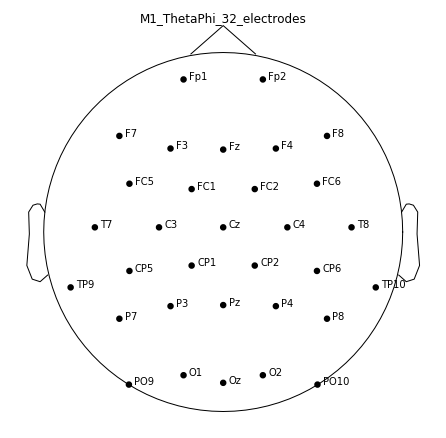

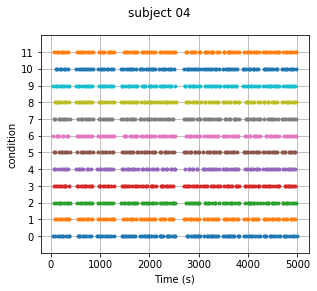

In [184]:
for sub in [4,5,6,7,8,9,10]:
    subs = fileHandling(sub)
    # load data
    raw     = mne.io.read_raw_brainvision(base_dir + os.sep + subs + os.sep + 'RK_200' + subs + '.vhdr', preload=True)

    # define the distribution of electrodes
    montage = mne.channels.read_montage(parent_dir + '/electrode_positions/M1_ThetaPhi_32_electrodes.txt', ch_names=None, path=None, unit='m', transform=False)    
    raw.set_montage(montage)
    f = montage.plot(kind = "topomap", show=False)

    # re-reference the channels
    raw.set_eeg_reference(ref_channels=ref)

    # low pass filtering
    raw.filter(None, 47.5, h_trans_bandwidth='auto', filter_length='auto', phase='zero')

    # blink detection
    eog_events1 = mne.preprocessing.find_eog_events(raw, ch_name='Fp1')
    eog_events2 = mne.preprocessing.find_eog_events(raw, ch_name='Fp2')
    eog_events = np.concatenate((eog_events1, eog_events2))
    n_blinks = len(eog_events)
    onsets = eog_events[:, 0] / raw.info['sfreq'] - 0.25 # Center to cover the whole blink with full duration of 0.5s
    durations = np.repeat(0.5, n_blinks)
    descriptions = ['bad blink'] * n_blinks
    raw.set_annotations = mne.Annotations(onsets, durations, descriptions, orig_time=raw.info['meas_date'])

    ### epoching
    events, events_id = mne.events_from_annotations(raw)
    events, events_id = eventConversion(events, events_id)
    plotEventDistribution()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False, exclude='bads')  # pick the channels

    epochs = mne.Epochs(raw, events, events_id,
                        tmin = 0.0,
                        tmax = 3.0,
                        proj=True, picks=picks,
                        baseline=(0., 0.322) ,
                        preload=True,
                        reject={"eeg":4e-4}, # empirisch?
                        reject_by_annotation = True,
                        detrend=0) # detrend = 0: mean centering, detrend = 1 linear detrending 
    epochs.drop_bad()
    
    for eoi in electrodes_of_interest:
        eoi_idx = raw.ch_names.index(eoi)

        plotDropouts()

        df = epochs.to_data_frame(picks=eoi_idx, scalings=1, scaling_time=1000, index=None, copy = True, long_format=True).drop(
            ["ch_type","channel"], axis = 1)

        plotEpochsConfidence()

        evoked = {cond[i] : epochs[cond[i]].average(method="mean") for i in range(12)}

        evoked = addSum(evoked)

        evoked = addDif(evoked)


        plotEvoked()

        plotDIF()

        saveData()

## group analysis

### load the subjects' evoked data

Upper case variables will be dedicated to group data.

In [37]:
Evoked = {}
for sub in range(7):
    Evoked[sub] = mne.evoked.read_evokeds(base_dir + os.sep + subStr(sub+4) + os.sep + 'data' + os.sep + 'evoked-ave.fif.gz', kind="average", verbose=0)

### plot the grand averages per condition

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are cor

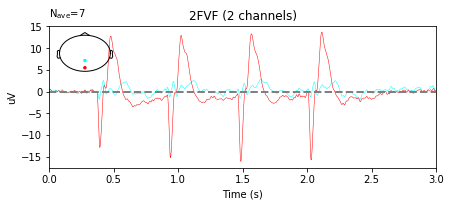

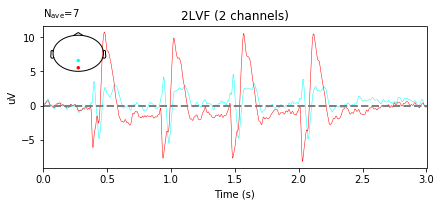

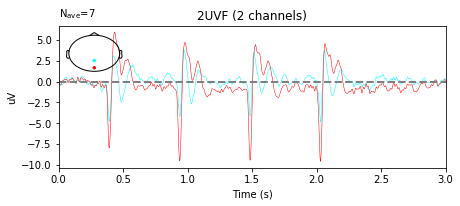

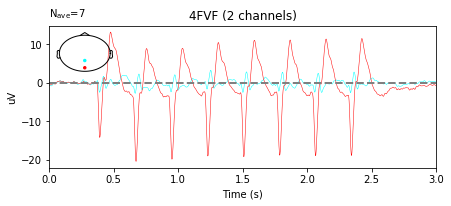

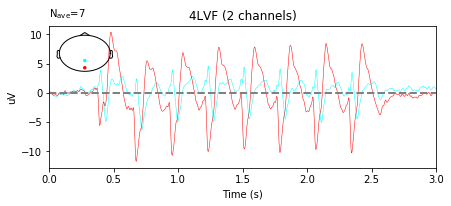

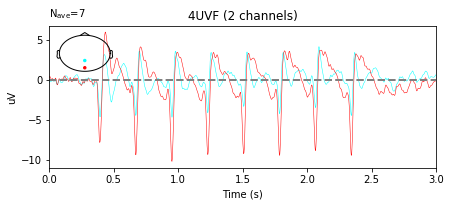

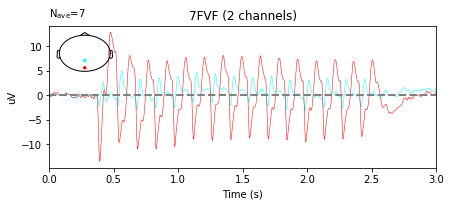

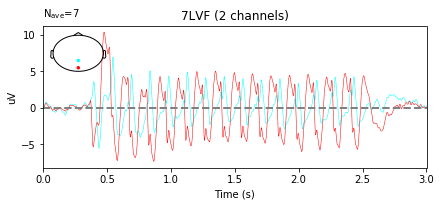

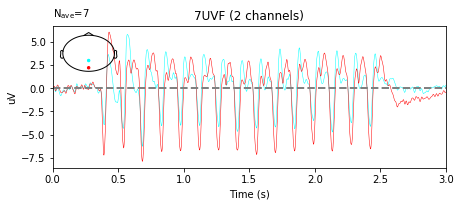

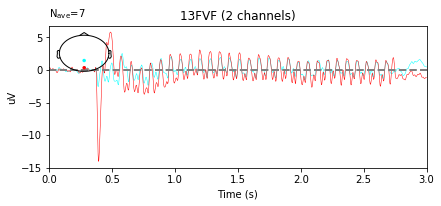

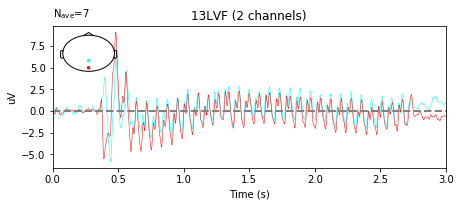

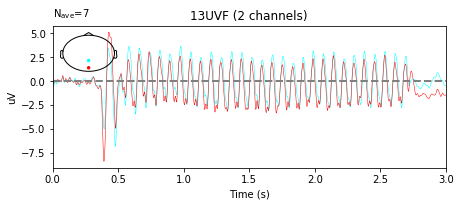

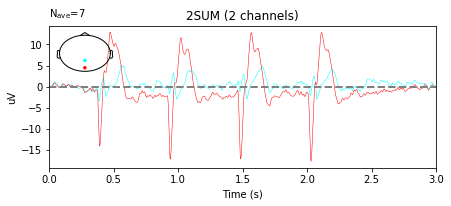

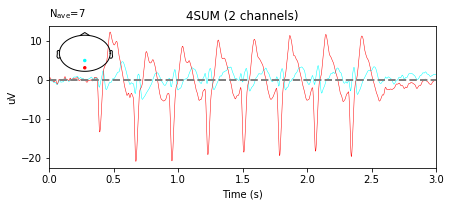

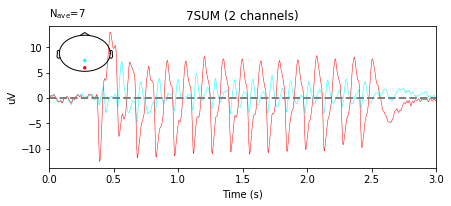

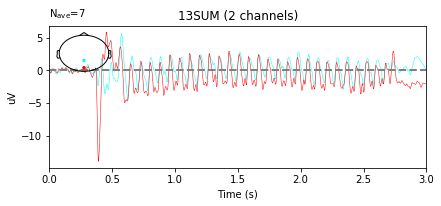

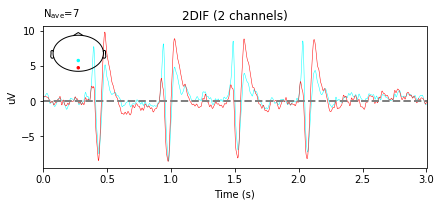

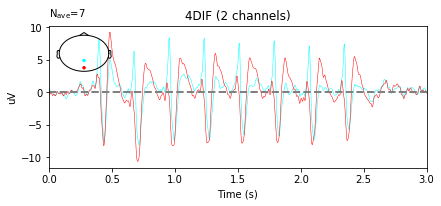

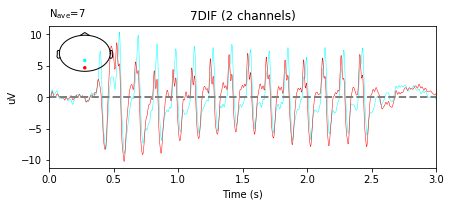

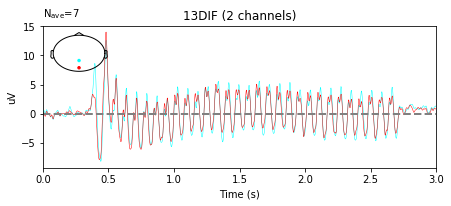

In [108]:
for i in range(len(Evoked[0])):
    cond = Evoked[0][i].comment
    grandAvg = mne.grand_average([Evoked[k][i] for k in range(7)])
    f = grandAvg.plot(picks=[24,29], show=False, titles = cond, spatial_colors=True, hline = [0])

### plot the grand averages for Oz (FVF,LVF,UVF,&SUM in one graph)

In [87]:
for freq in range(len(Evoked[0])):
    cond = Evoked[0][i].comment
    grandAvg = mne.grand_average([Evoked[k][i] for k in range(7)])
    f = grandAvg.plot(picks=[24,29], show=False, titles = cond, spatial_colors=True, hline = [0])